# 1. Project Introduction

#### This project will involve using an unsupervised ML algorithm to perform customer segmentation of active credit card holders. The data for this project comes from Kaggle: https://www.kaggle.com/arjunbhasin2013/ccdata. 

#### In this scenario, we will be considering five main types of credit card holders:
* Max payers: the most reliable users -- have a reputation of paying their debts in due terms. They avoid paying interest on credit card purchases and generally have high credit scores.  
* Revolveres: these holders usually carry their balance forward from month-to-month. Companies typically profit from these customers.
* Non-payers: as the name says, these holders use up the maximum credit available to them and don't pay it back. Companies would not want these customers.
* Traders: considered the cleverest -- these users get their hands on the best credit cards to earn the most reward points, longest payback tenures, and even additional cash back. After using the maximum amount, they search for cards with a transfer of balance with no fee or the lowest interest rate. 
* Non-users: These customers have a card but are extremely cautious with it.

# 2. Explore the Contours of the Dataset

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

# Use the monokai theme to visualize our graphs more clearly.

In [6]:
creditcard_df = pd.read_csv(r'/Users/MOON/Downloads/marketing_data.csv')

# Here are the labels that we will be examining: 

# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [7]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
# Some key insights after using .describe():

# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# 2. Data Preparation and Visualization

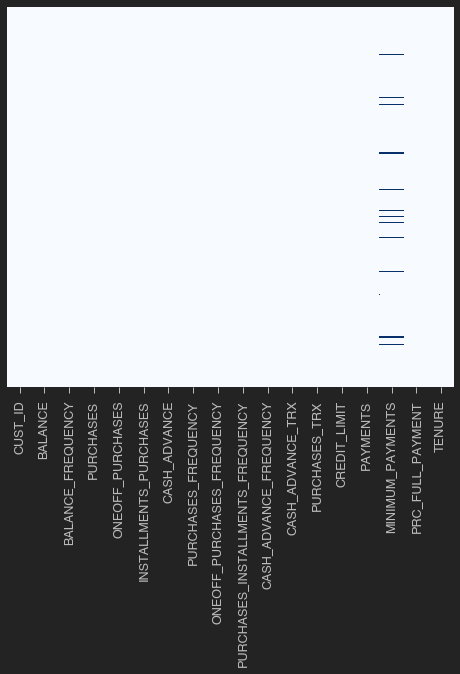

In [10]:
# Check for missing data.
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [11]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
# Replace null values in MINIMUM_PAYMENTS with the average of MINIMUM_PAYMENTS.
creditcard_df.loc[creditcard_df['MINIMUM_PAYMENTS'].isnull(), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [13]:
# Repeat this process for CREDIT_LIMIT.
creditcard_df.loc[creditcard_df['CREDIT_LIMIT'].isnull(), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [16]:
# Check that all null values have been filled.
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [18]:
# Drop the CUST_ID column.
creditcard_df.drop('CUST_ID', axis=1, inplace=True)

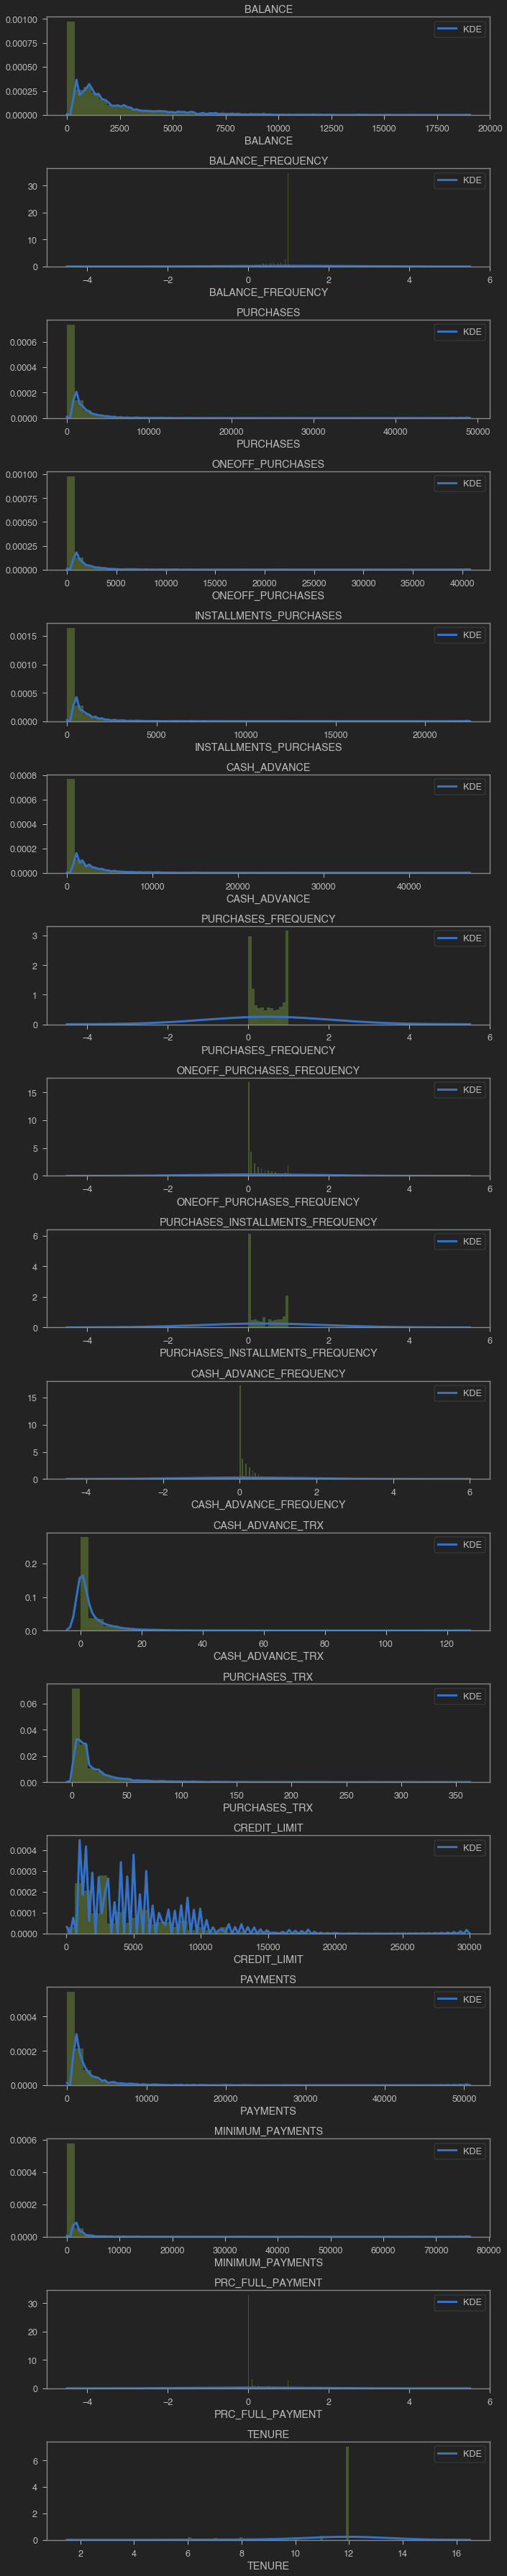

In [19]:
# Use distplot to combine plt.hist with sns.kdeplot() for each column in our dataset.

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE", "bw": 1.5}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

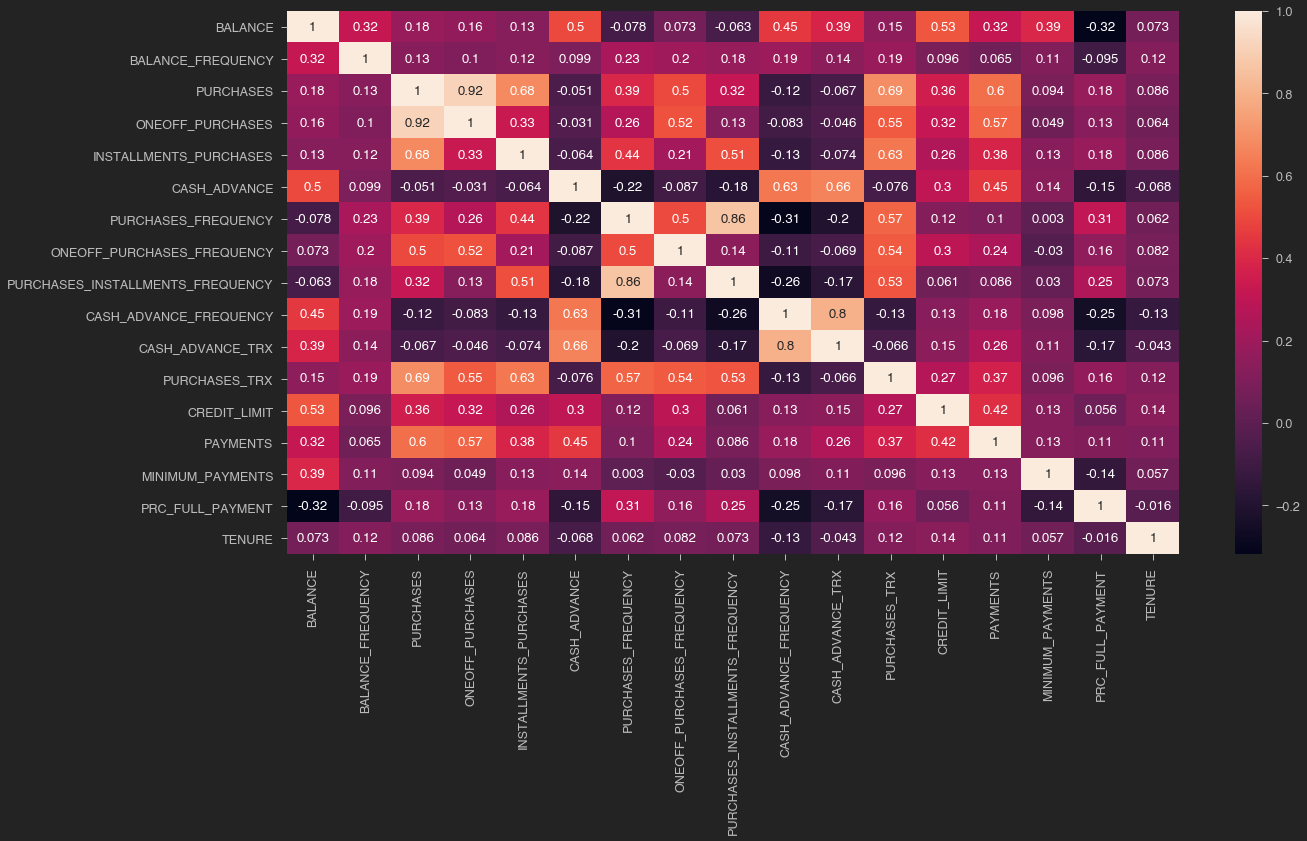

In [20]:
# Now, plot correlations in our dataset.
# Note the high corr between PURCHASES and ONEOFF_PURCHASES.

correlations = creditcard_df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(correlations, annot = True)

# 3. Implement the K-Means Algorithm

In [33]:
# To find the optimal number of clusters, I will be using the elbow method.
# Begin by scaling data given the diversity of ranges we have in our columns.

scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [34]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

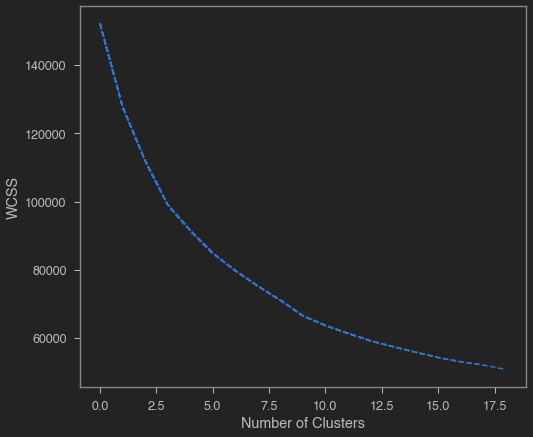

In [35]:
# Now, plot the number of clusters against WCSS (within cluster sum of squares).
# Note that the criteria we are minimizing is inertia (WCSS).

scores = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled)
    scores.append(kmeans.inertia_)

    plt.plot(scores, 'bx--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    
# Values begin to reduce linearly starting from 7 clusters, so we'll use that.

In [36]:
kmeans = KMeans(7)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [37]:
kmeans.cluster_centers_.shape

(7, 17)

In [38]:
labels.max()

6

In [39]:
labels.min()

0

In [40]:
# Use centroids to create a dataframe.
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.137694,0.430638,0.948679,0.899733,0.590154,-0.307245,1.097027,1.869649,0.544232,-0.407767,-0.317053,1.213251,0.709107,0.397058,-0.032338,0.458356,0.307642
1,1.661272,0.393642,-0.207233,-0.151296,-0.212127,1.982914,-0.459338,-0.194477,-0.405804,1.901050,1.907494,-0.245771,1.003661,0.826691,0.547609,-0.392037,0.070730
2,-0.372367,0.330328,-0.041287,-0.233641,0.331447,-0.369405,0.979981,-0.353633,1.171410,-0.478756,-0.363262,0.170077,-0.281204,-0.224020,-0.029229,0.308670,0.254192
3,0.004638,0.403146,-0.342661,-0.223585,-0.399344,-0.107980,-0.808481,-0.333675,-0.752576,0.080554,-0.043903,-0.463881,-0.302218,-0.249285,-0.016140,-0.452264,0.272149
4,-0.701719,-2.134810,-0.307505,-0.230900,-0.302771,-0.321909,-0.549111,-0.429500,-0.442252,-0.520230,-0.375627,-0.417099,-0.172908,-0.201909,-0.257269,0.293989,0.199793
5,-0.335410,-0.341582,-0.283994,-0.209054,-0.287071,0.066403,-0.193767,-0.272626,-0.226075,0.303329,-0.002270,-0.384892,-0.551431,-0.389121,-0.209952,0.012044,-3.190495
6,1.443484,0.415902,7.043767,6.181111,5.296366,0.029765,1.084224,1.874158,1.042173,-0.253894,-0.050586,4.698379,2.166844,4.825204,1.092576,0.814424,0.333671


In [41]:
# Perform inverse transformation to understand our results.
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers


# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1851.073685,0.979285,3030.072508,2085.809219,944.736475,334.564481,0.930641,0.760210,0.580729,0.053546,1.085174,44.866719,7074.469458,2882.586474,788.844945,0.287776,11.929022
1,5022.273168,0.970521,560.448093,341.316951,219.243858,5137.134762,0.305996,0.144441,0.203161,0.515564,16.266075,8.600887,8146.180206,4126.331988,2140.385928,0.039050,11.611973
2,789.423339,0.955522,914.995343,204.641978,710.790818,204.211593,0.883664,0.096962,0.829986,0.039340,0.769833,18.937316,3471.312538,1084.629259,796.088548,0.243995,11.857493
3,1574.128740,0.972772,271.104214,221.332849,49.945864,752.431361,0.165868,0.102916,0.065344,0.151264,2.949224,3.179478,3394.857781,1011.488954,826.592843,0.021435,11.881523
4,103.905679,0.371554,346.216442,209.190589,137.275475,303.813584,0.269966,0.074329,0.188675,0.031041,0.685450,4.342304,3865.340155,1148.636336,264.651249,0.239701,11.784693
5,866.346588,0.796353,396.446254,245.449794,151.472651,1118.121121,0.412583,0.121128,0.274589,0.195843,3.233333,5.142857,2488.118174,606.676652,374.921780,0.157237,7.247619
6,4568.965194,0.975794,16052.320602,10851.814819,5200.505783,1041.289988,0.925502,0.761555,0.778624,0.084337,2.903614,131.493976,12378.313253,15701.636847,3410.408242,0.391920,11.963855


#### Based on these results, we can assign some of the types of credit card holders we identified above to our kmeans labels.
* Revolvers constitute the cluster with the highest balance (\$5022.27) and a low percentage of full payment (~3%)
* Max payers constitute the cluster with the highest percentage of full payment (~39%) and highest credit limit
* Non-users constitute the cluster with the lowest balance ($103.91) and the lowest balance frequency
* Non-payers constitute the cluster with a high balance frequency (~98%) and the highest purchases/one-off purchases

Of course, it's important to note that these results could be interpreted differently, as there is a lot of room for justification for each type of credit card holder and its corresponding label.

In [44]:
# Train the model and predict the closest cluster each sample belongs to. This could be used for subsequent supervised ML problems.
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([2, 5, 6, ..., 0, 0, 0], dtype=int32)

In [45]:
# Concatenate the clusters labels to our original dataframe.
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


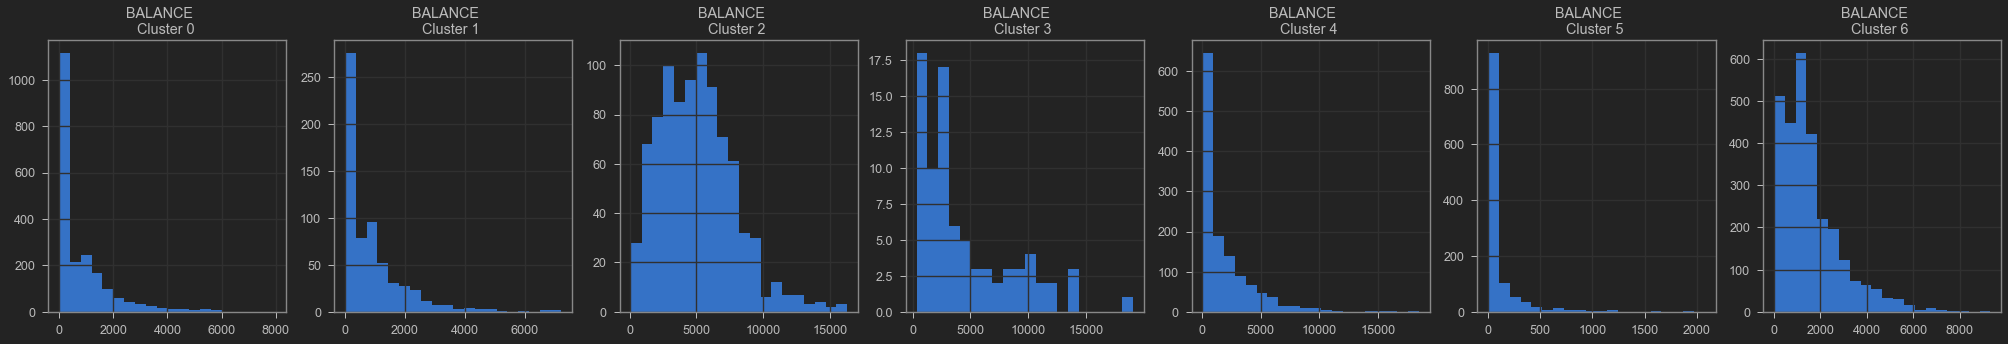

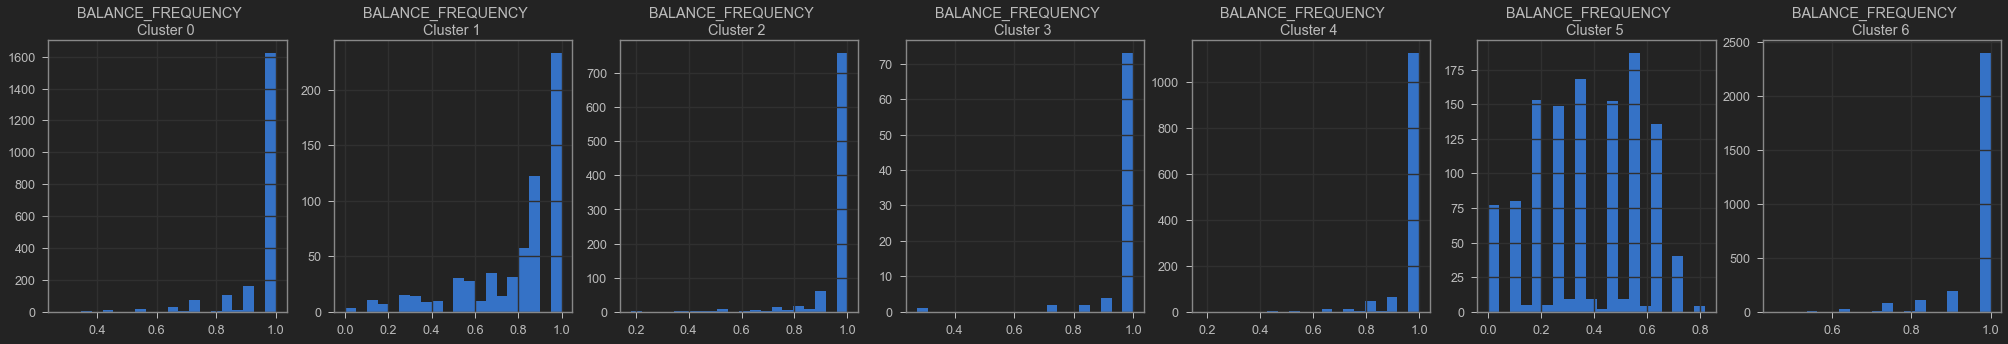

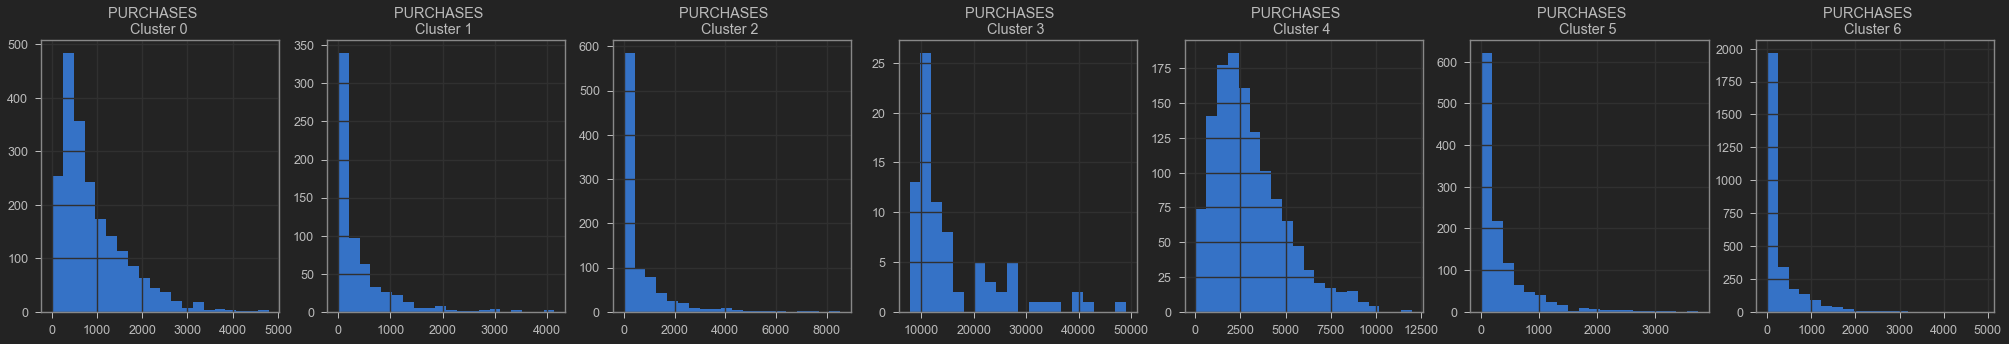

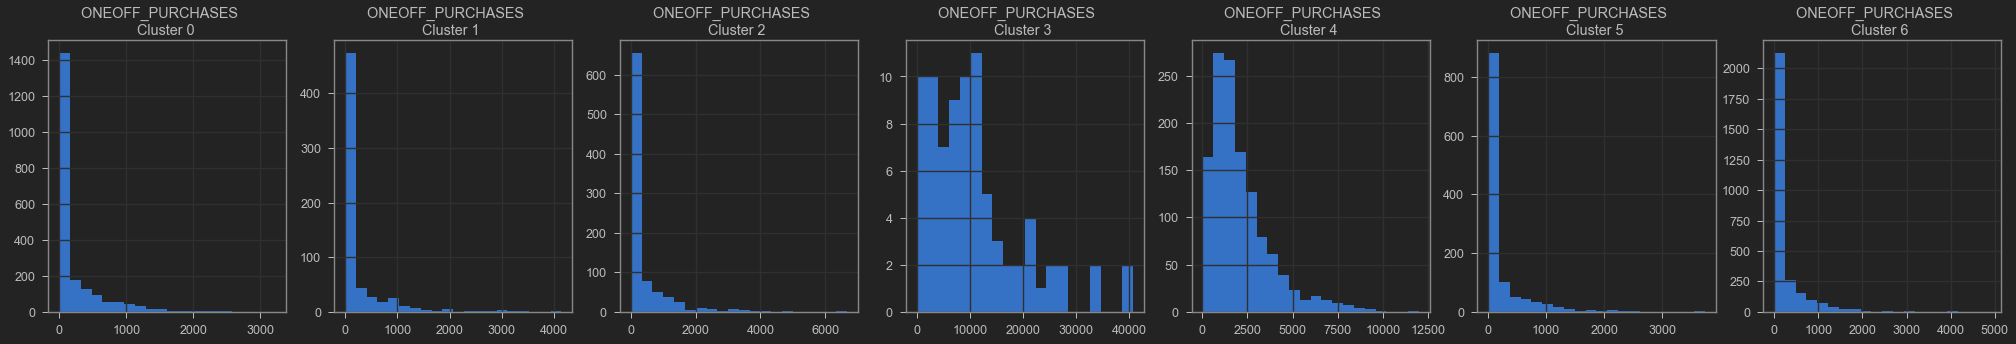

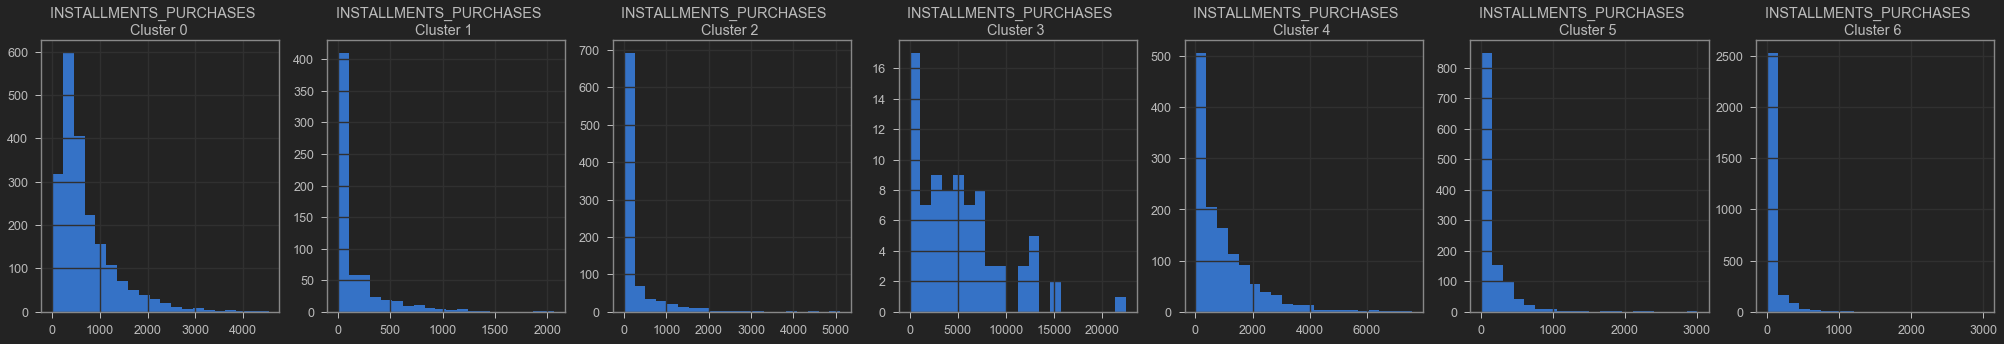

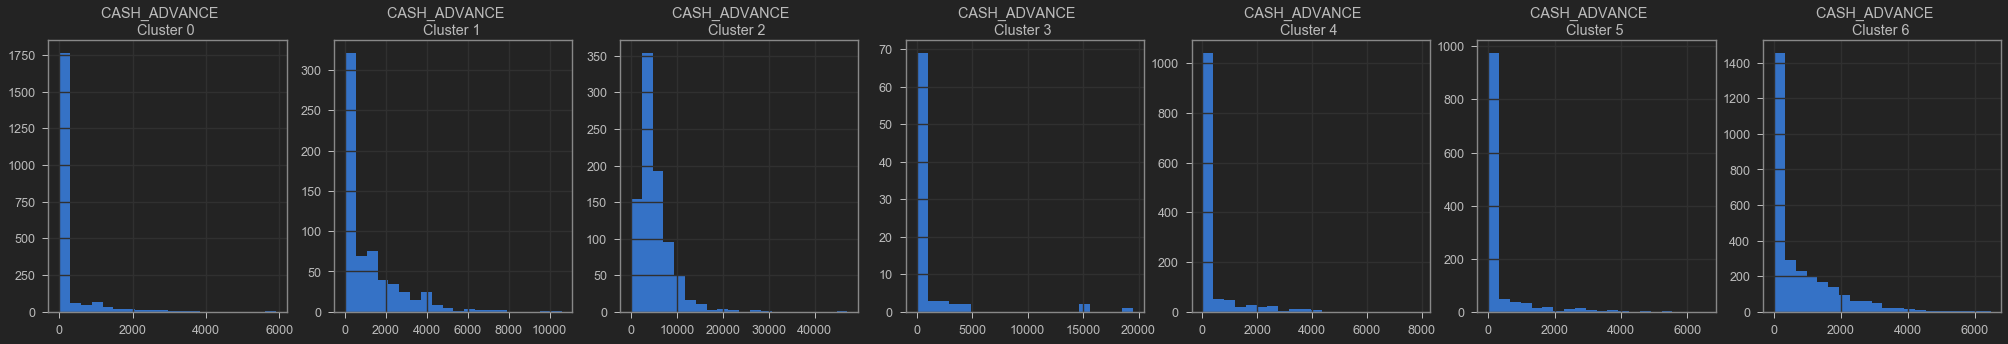

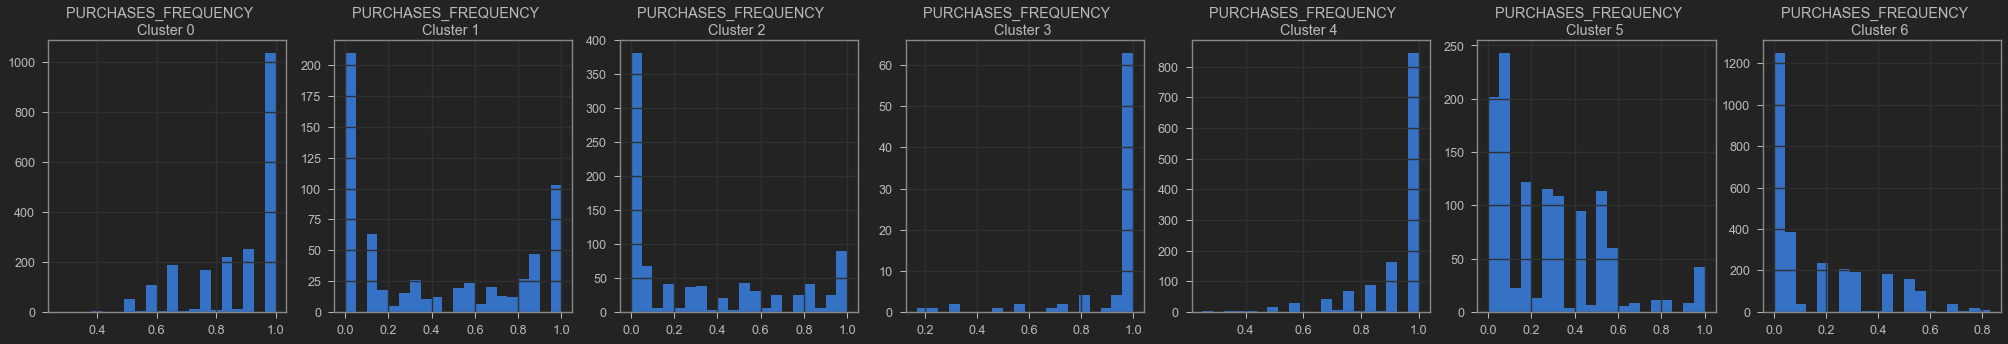

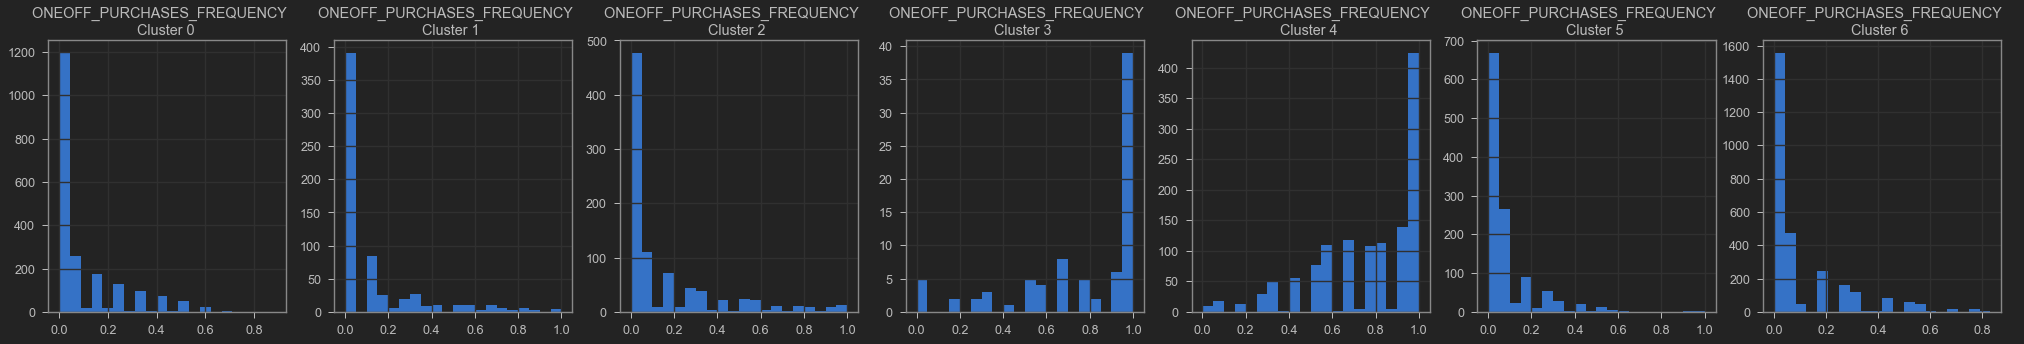

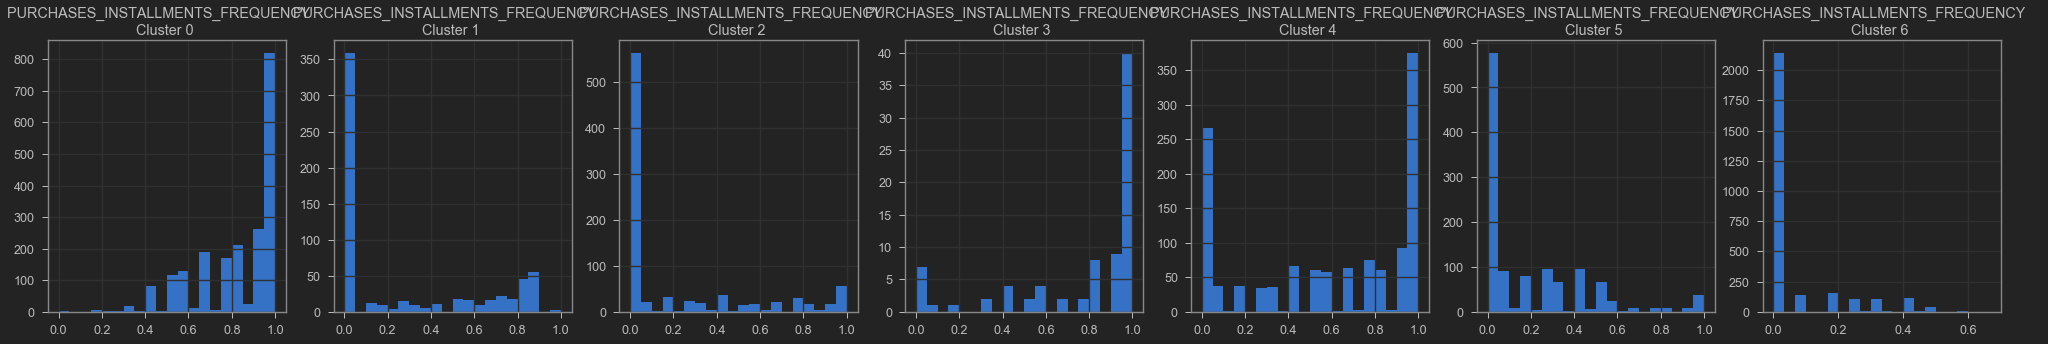

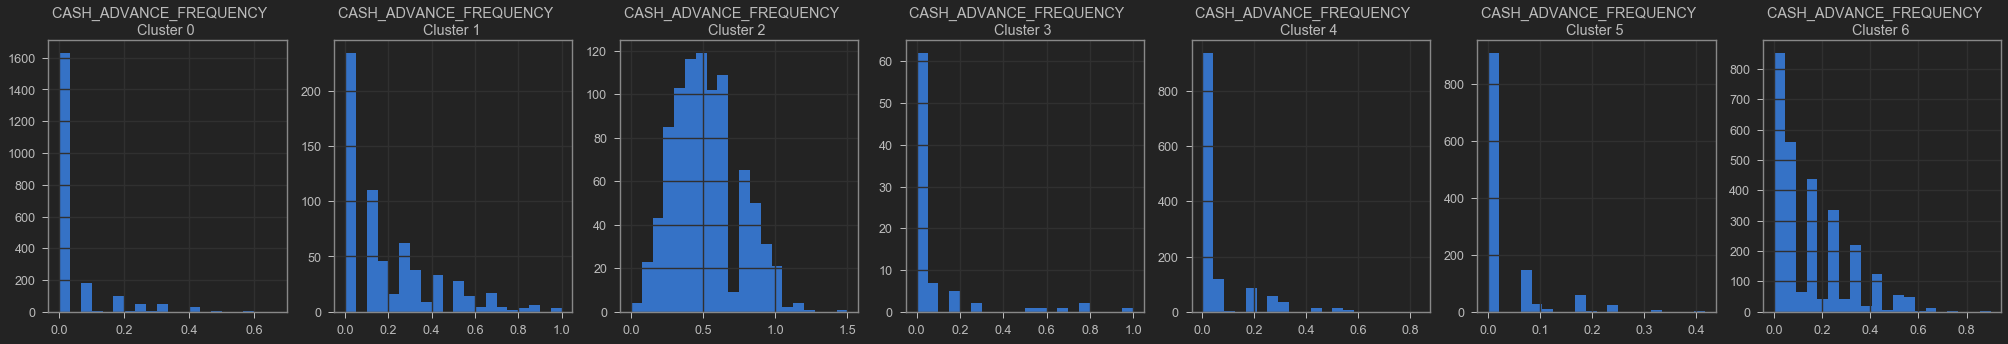

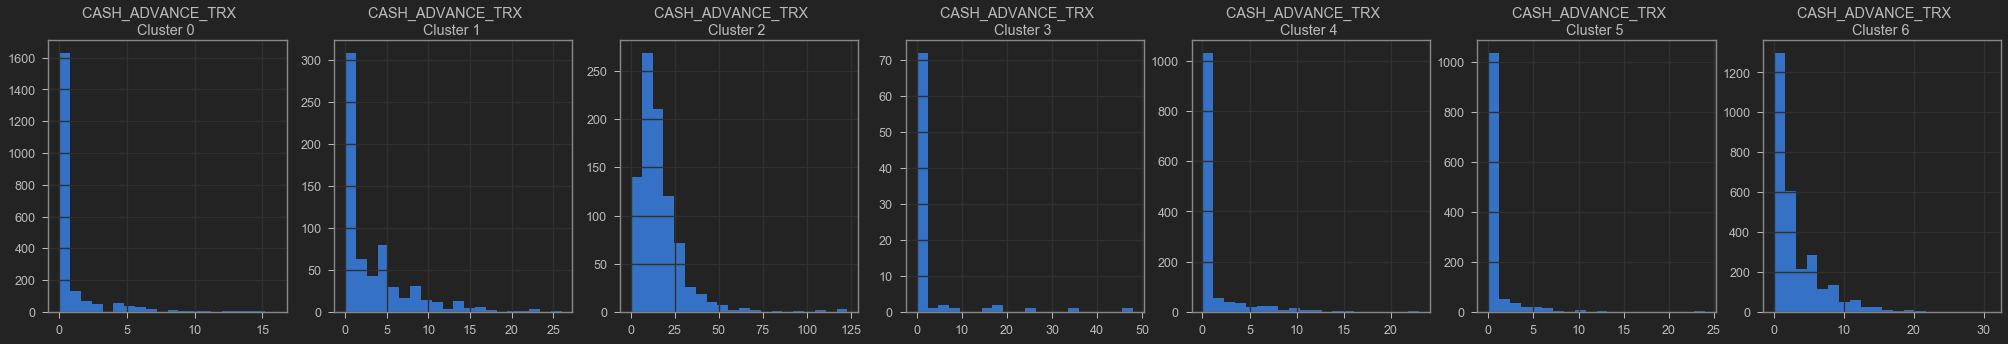

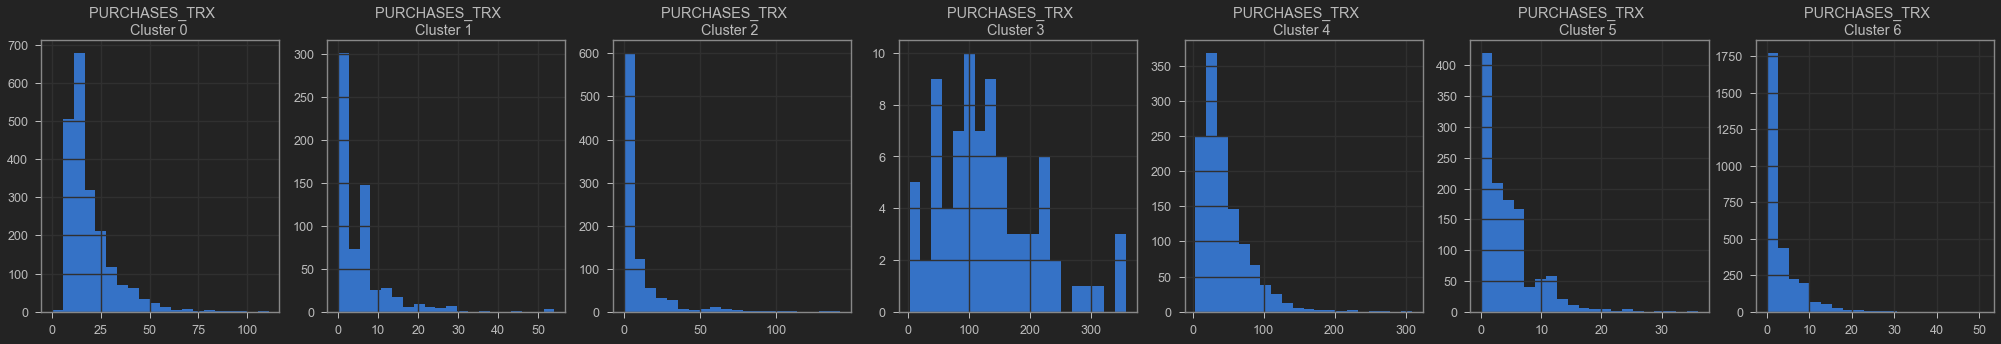

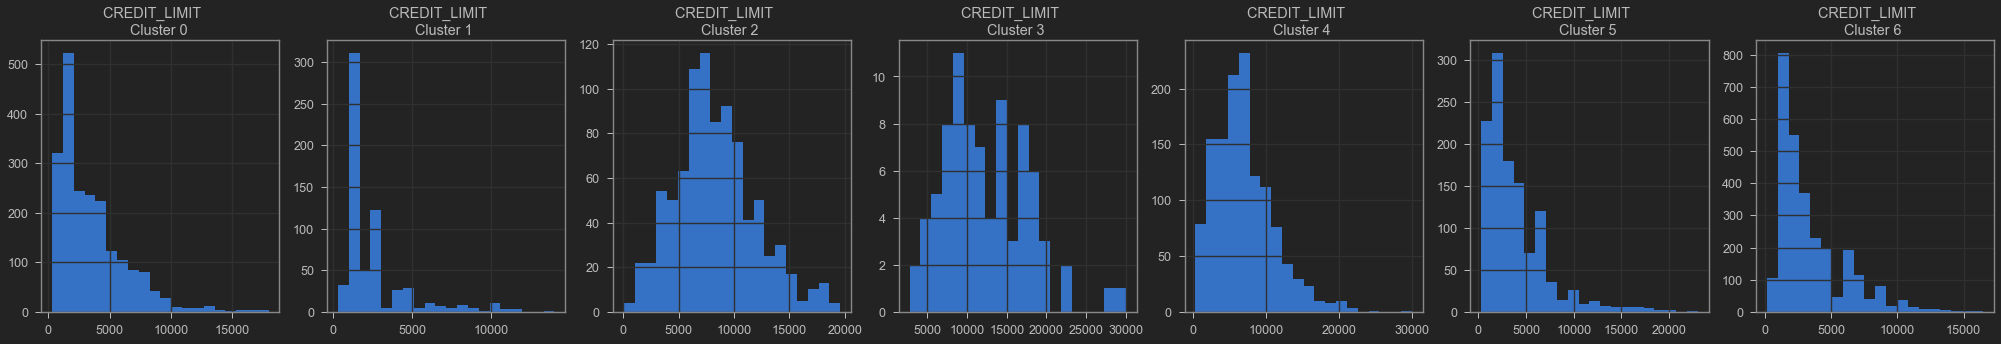

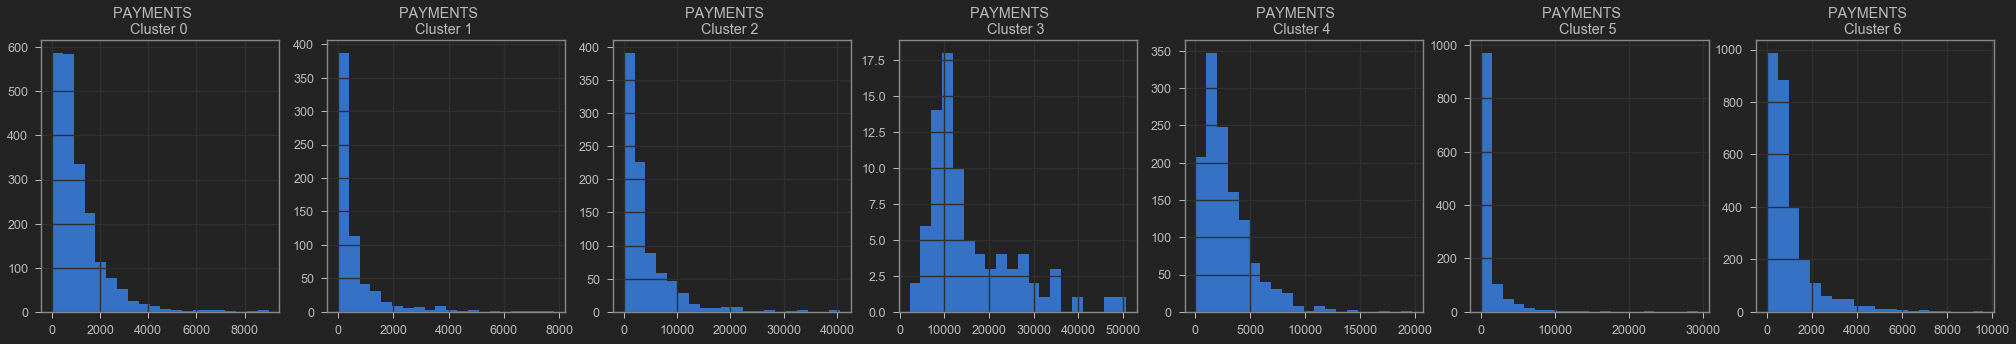

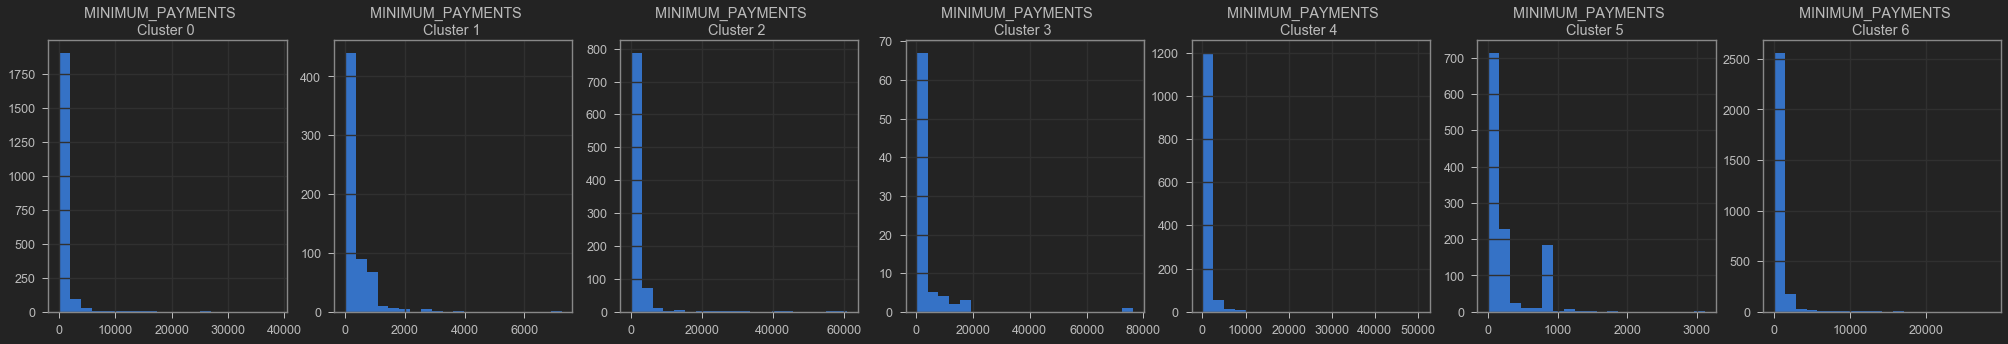

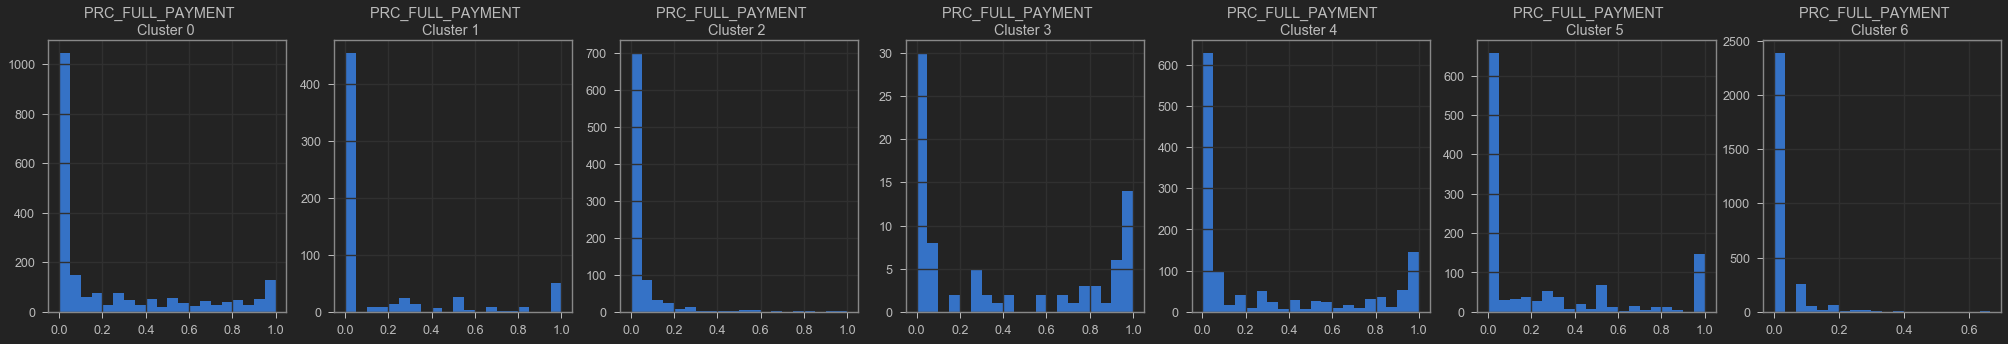

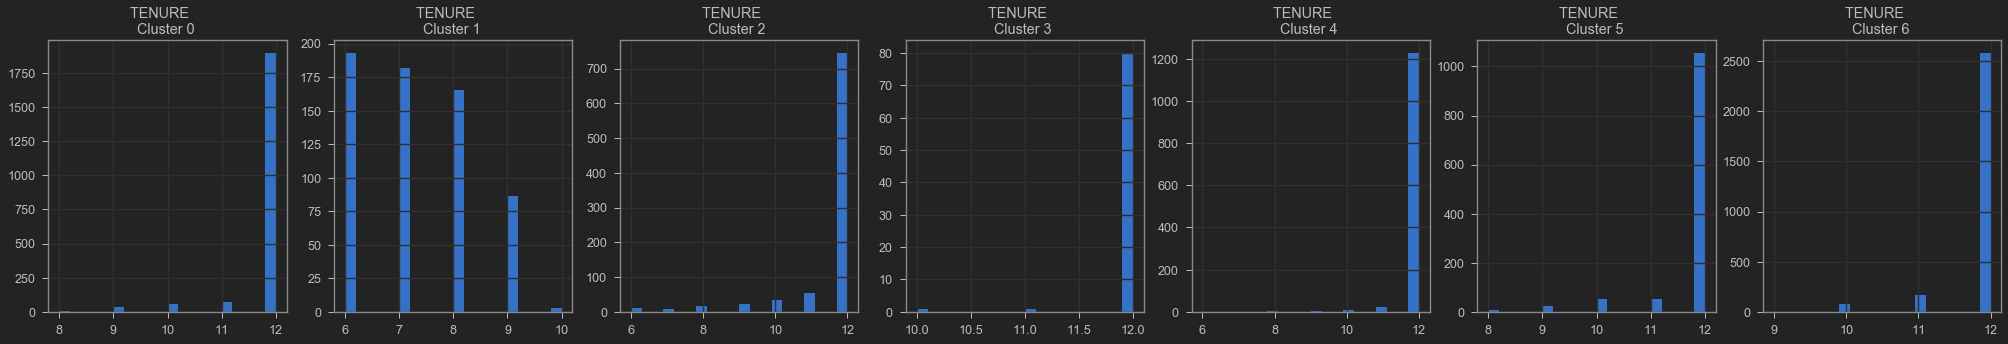

In [43]:
# Now, for each column plot its distribution according to its corresponding label.
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()



# 4. Use Principal Component Analysis to Investigate Results

In [46]:
# Obtain the principal components (use 2).
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221956, -1.07644168],
       [-1.13829465,  2.50649827],
       [ 0.96968415, -0.383529  ],
       ...,
       [-0.92620351, -1.81078497],
       [-2.3365521 , -0.65796831],
       [-0.55642424, -0.4004889 ]])

In [47]:
# Create a dataframe with the two components.
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076442
1,-1.138295,2.506498
2,0.969684,-0.383529
3,-0.873625,0.043184
4,-1.599434,-0.688577


In [51]:
# Concatenate the clusters labels to the dataframe. 
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076442,3
1,-1.138295,2.506498,1
2,0.969684,-0.383529,0
3,-0.873625,0.043184,3
4,-1.599434,-0.688577,3


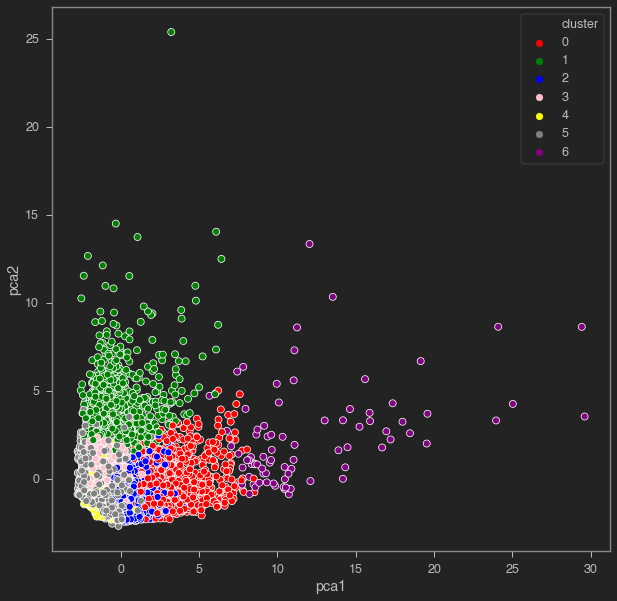

In [52]:
# Plot our PCA dataframe. 
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.show()

#### And that's it for this project! Because market segmentation is such an essential part of properly allocating market resources and maximizing up-selling opportunities, I can definitely see this project being implemented in other domains.

#### Special thanks to Robin Patiyal for this guided project!